In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np # linear algebra
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import math
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

print("Setup Complete")

Setup Complete


In [5]:
#모델불러오기
dam = pd.read_csv('보령댐_일별.csv', encoding= 'cp949', thousands=',')
dam.head()

,일시,댐수위(ELm),강우량(mm),유입량(㎡/sec),총방류량(㎡/sec),저수량(백만㎥/sec),저수율(%)
0,2015-01-01,66.10,0.0,1.7,2.7,52.91,45.3
1,2015-01-02,66.10,1.7,2.7,2.7,52.91,45.3
2,2015-01-03,66.08,0.0,1.6,2.6,52.83,45.2
3,2015-01-04,66.06,0.0,1.7,2.7,52.74,45.1
4,2015-01-05,66.04,13.2,1.8,2.8,52.65,45.0


In [6]:
dam.columns = ['date', 'water_level', 'rainfall', 'inflow', 'outflow', 'storage', 'storage_rate']
dam.head()

,date,water_level,rainfall,inflow,outflow,storage,storage_rate
0,2015-01-01,66.10,0.0,1.7,2.7,52.91,45.3
1,2015-01-02,66.10,1.7,2.7,2.7,52.91,45.3
2,2015-01-03,66.08,0.0,1.6,2.6,52.83,45.2
3,2015-01-04,66.06,0.0,1.7,2.7,52.74,45.1
4,2015-01-05,66.04,13.2,1.8,2.8,52.65,45.0


In [7]:
#결측값 확인
print(dam.isnull().sum())

date            0
water_level     0
rainfall        3
inflow          0
outflow         0
storage         0
storage_rate    0
dtype: int64


In [8]:
dam=dam.interpolate()

In [9]:
#숫자로 변환 (필요할 경우 사용)
dam['inflow'] = pd.to_numeric(dam['inflow'],errors='coerce')

In [10]:
dam.describe()

,water_level,rainfall,inflow,outflow,storage,storage_rate
count,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000
mean,63.836513,3.747102,3.957829,3.880179,44.497528,38.068655
std,4.468232,14.417918,15.275968,11.291775,17.339779,14.833018
min,52.160000,0.000000,0.000000,1.600000,9.690000,8.300000
25%,61.080000,0.000000,0.700000,2.700000,32.880000,28.110000
50%,63.130000,0.000000,1.500000,3.100000,40.300000,34.500000
75%,65.915000,0.400000,2.700000,3.400000,51.870000,44.400000
max,73.910000,293.000000,476.400000,535.900000,88.220000,75.500000


In [11]:
dam = dam.reset_index(drop=True)

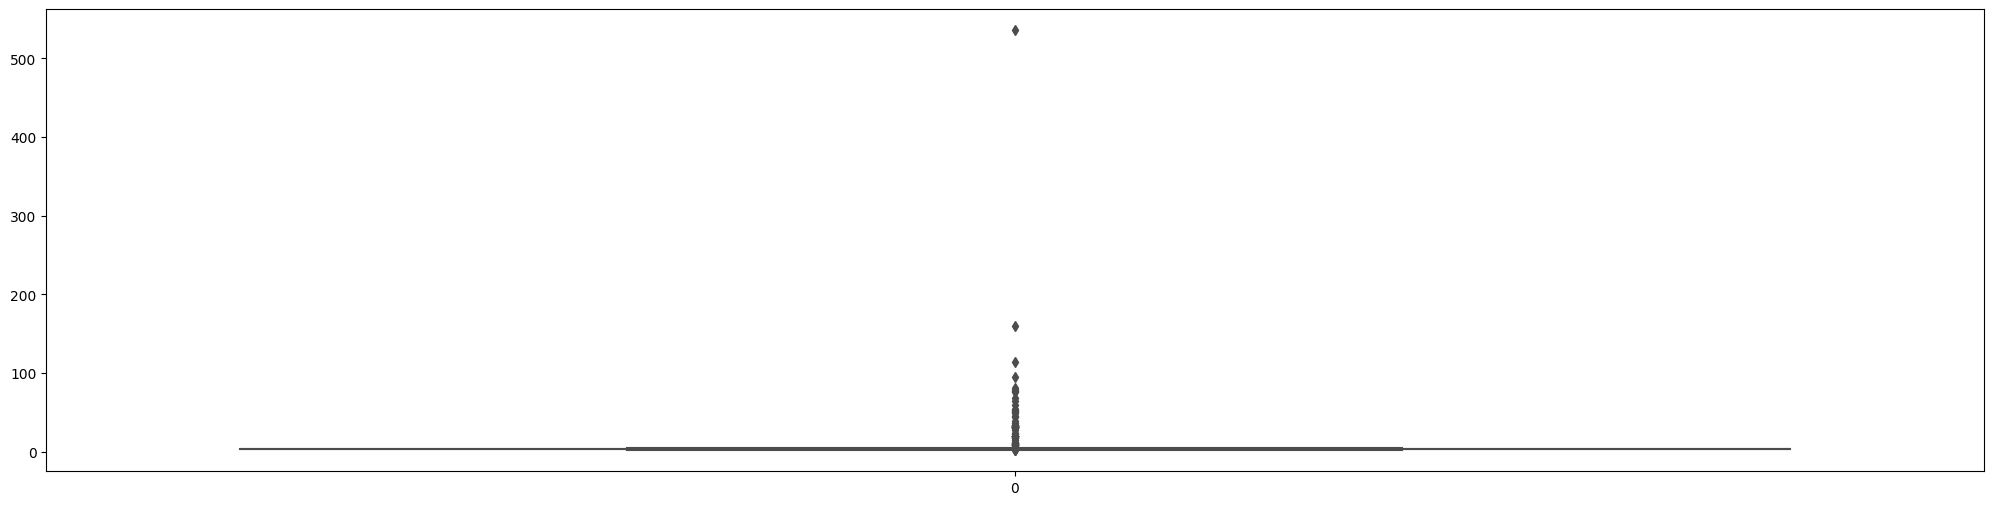

In [12]:
plt.figure(figsize=(25,6))
sns.boxplot(data=dam['outflow'], color='red')
plt.show()

In [13]:
#remove outlier

Q1 = dam['outflow'].quantile(0.25)
Q3 = dam['outflow'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (dam['outflow'] >= Q1 - 1.5 * IQR) & (dam['outflow'] <= Q3 + 1.5 *IQR)
dam = dam.loc[filter]
print(dam['outflow'].describe())
print('\n')
print(dam['outflow'].describe())

count    3051.000000
mean        3.047886
std         0.486329
min         1.700000
25%         2.700000
50%         3.100000
75%         3.400000
max         4.400000
Name: outflow, dtype: float64


count    3051.000000
mean        3.047886
std         0.486329
min         1.700000
25%         2.700000
50%         3.100000
75%         3.400000
max         4.400000
Name: outflow, dtype: float64


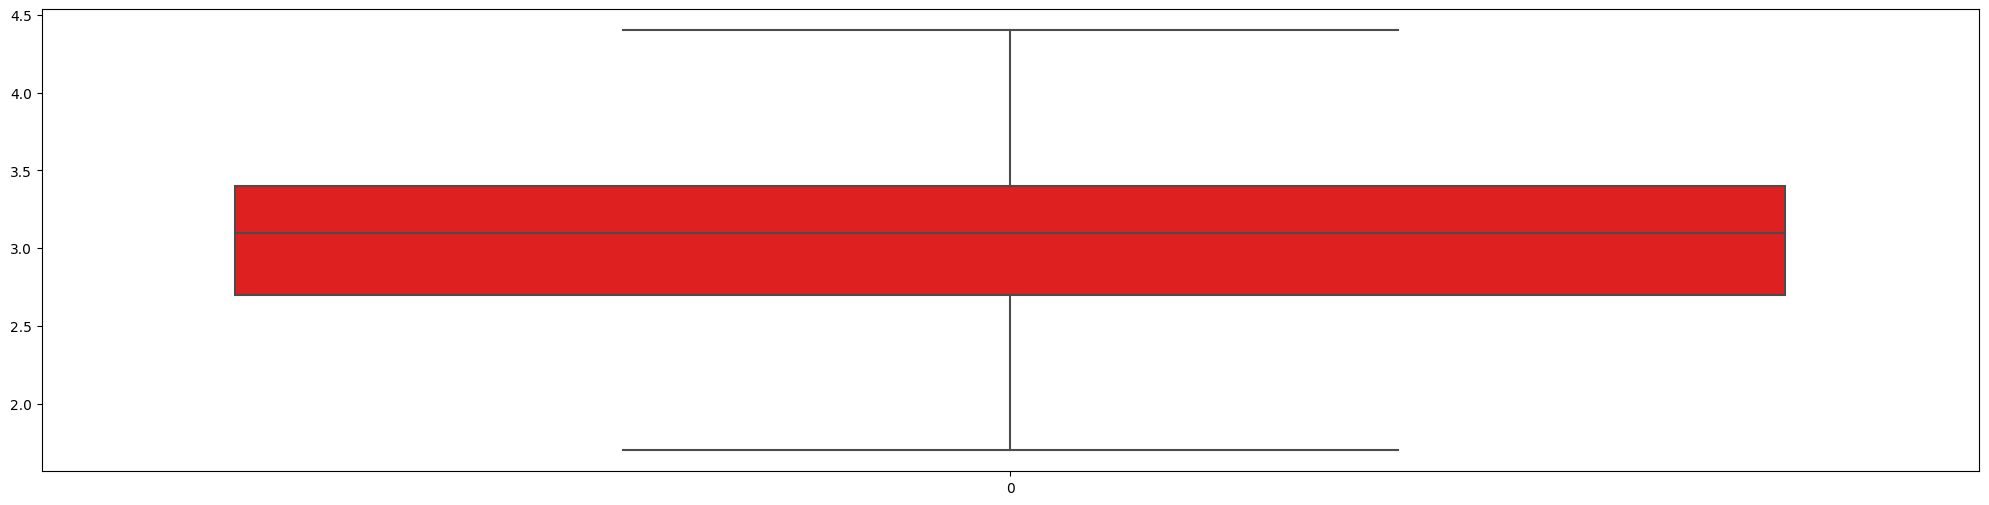

In [14]:
plt.figure(figsize=(25,6))
sns.boxplot(data=dam['outflow'], color='red')
plt.show()

In [15]:
dam = dam.reset_index(drop=True)

In [16]:
dam["date"] = pd.to_datetime(dam["date"])
dam.index = dam["date"]

In [17]:
dam.head()

,date,water_level,rainfall,inflow,outflow,storage,storage_rate
date,,,,,,,
2015-01-01,2015-01-01,66.10,0.0,1.7,2.7,52.91,45.3
2015-01-02,2015-01-02,66.10,1.7,2.7,2.7,52.91,45.3
2015-01-03,2015-01-03,66.08,0.0,1.6,2.6,52.83,45.2
2015-01-04,2015-01-04,66.06,0.0,1.7,2.7,52.74,45.1
2015-01-05,2015-01-05,66.04,13.2,1.8,2.8,52.65,45.0


In [18]:
dam

,date,water_level,rainfall,inflow,outflow,storage,storage_rate
date,,,,,,,
2015-01-01,2015-01-01,66.10,0.0,1.7,2.7,52.91,45.30
2015-01-02,2015-01-02,66.10,1.7,2.7,2.7,52.91,45.30
2015-01-03,2015-01-03,66.08,0.0,1.6,2.6,52.83,45.20
2015-01-04,2015-01-04,66.06,0.0,1.7,2.7,52.74,45.10
2015-01-05,2015-01-05,66.04,13.2,1.8,2.8,52.65,45.00
...,...,...,...,...,...,...,...
2023-07-06,2023-07-06,65.35,0.0,18.5,3.2,48.06,41.12
2023-07-07,2023-07-07,66.05,57.8,35.3,3.2,50.84,43.49
2023-07-08,2023-07-08,66.68,0.0,32.6,3.2,53.38,45.66


In [19]:
features = dam[['rainfall', 'inflow', 'outflow', 'storage', 'storage_rate']]
print(features)

            rainfall  inflow  outflow  storage  storage_rate
date                                                        
2015-01-01       0.0     1.7      2.7    52.91         45.30
2015-01-02       1.7     2.7      2.7    52.91         45.30
2015-01-03       0.0     1.6      2.6    52.83         45.20
2015-01-04       0.0     1.7      2.7    52.74         45.10
2015-01-05      13.2     1.8      2.8    52.65         45.00
...              ...     ...      ...      ...           ...
2023-07-06       0.0    18.5      3.2    48.06         41.12
2023-07-07      57.8    35.3      3.2    50.84         43.49
2023-07-08       0.0    32.6      3.2    53.38         45.66
2023-07-09       0.0    15.3      3.2    54.42         46.56
2023-07-10       8.5    11.3      3.2    55.13         47.16

[3051 rows x 5 columns]


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(features)
dam_scaled=scaler.transform(features)

dam_scaled=pd.DataFrame(data=dam_scaled, columns=list(features))
print('feature 최솟값')
print(dam_scaled.min())
print('\n''fearure 최댓값')
print(dam_scaled.max())

feature 최솟값
rainfall        0.0
inflow          0.0
outflow         0.0
storage         0.0
storage_rate    0.0
dtype: float64

fearure 최댓값
rainfall        1.0
inflow          1.0
outflow         1.0
storage         1.0
storage_rate    1.0
dtype: float64


In [21]:
dam['variation'] = 0
for i, idx in enumerate(dam.index):
    dam.loc[idx, 'variation'] = dam_scaled['rainfall'][i]+dam_scaled['inflow'][i]-dam_scaled['outflow'][i]

In [22]:
dam_scaled

,rainfall,inflow,outflow,storage,storage_rate
0,0.000000,0.006781,0.370370,0.559845,0.560606
1,0.007482,0.010770,0.370370,0.559845,0.560606
2,0.000000,0.006382,0.333333,0.558808,0.559091
3,0.000000,0.006781,0.370370,0.557642,0.557576
4,0.058099,0.007180,0.407407,0.556477,0.556061
...,...,...,...,...,...
3046,0.000000,0.073793,0.555556,0.497021,0.497273
3047,0.254401,0.140806,0.555556,0.533031,0.533182
3048,0.000000,0.130036,0.555556,0.565933,0.566061
3049,0.000000,0.061029,0.555556,0.579404,0.579697


In [23]:
dam = dam.reset_index(drop=True)

In [24]:
df = dam['variation']
df

0      -0.363589
1      -0.352118
2      -0.326951
3      -0.363589
4      -0.342129
          ...   
3046   -0.481762
3047   -0.160348
3048   -0.425520
3049   -0.494526
3050   -0.473070
Name: variation, Length: 3051, dtype: float64

In [25]:
ds_list = []

for i in range(1,len(df)):
    ds = df[i]-df[i-1]
    ds_list.append(ds)

ds_dt = pd.DataFrame(ds_list)

In [26]:
ds_dt.columns = ['ds_dt']
print(ds_dt)

         ds_dt
0     0.011471
1     0.025167
2    -0.036638
3     0.021460
4     0.006557
...        ...
3045 -0.250354
3046  0.321414
3047 -0.265171
3048 -0.069007
3049  0.021457

[3050 rows x 1 columns]


In [27]:
ds_dt['ds_dt'] = pd.to_numeric(ds_dt['ds_dt'],errors='coerce')
print(ds_dt)

         ds_dt
0     0.011471
1     0.025167
2    -0.036638
3     0.021460
4     0.006557
...        ...
3045 -0.250354
3046  0.321414
3047 -0.265171
3048 -0.069007
3049  0.021457

[3050 rows x 1 columns]


In [28]:
dam = dam[1:]

In [29]:
dam_scaled = dam_scaled[1:]

- 현재 댐 관련 데이터가 2015-01-01 시점부터 2023-07-10 시점까지 존재.

In [30]:
dam = dam.reset_index(drop=True)
print(dam)

           date  water_level  rainfall  inflow  outflow  storage  \
0    2015-01-02        66.10       1.7     2.7      2.7    52.91   
1    2015-01-03        66.08       0.0     1.6      2.6    52.83   
2    2015-01-04        66.06       0.0     1.7      2.7    52.74   
3    2015-01-05        66.04      13.2     1.8      2.8    52.65   
4    2015-01-06        66.07       4.1     4.2      2.7    52.78   
...         ...          ...       ...     ...      ...      ...   
3045 2023-07-06        65.35       0.0    18.5      3.2    48.06   
3046 2023-07-07        66.05      57.8    35.3      3.2    50.84   
3047 2023-07-08        66.68       0.0    32.6      3.2    53.38   
3048 2023-07-09        66.94       0.0    15.3      3.2    54.42   
3049 2023-07-10        67.11       8.5    11.3      3.2    55.13   

      storage_rate  variation  
0            45.30  -0.352118  
1            45.20  -0.326951  
2            45.10  -0.363589  
3            45.00  -0.342129  
4            45.20  -0.

In [31]:
dam_scaled = dam_scaled.reset_index(drop=True)
print(dam_scaled)

      rainfall    inflow   outflow   storage  storage_rate
0     0.007482  0.010770  0.370370  0.559845      0.560606
1     0.000000  0.006382  0.333333  0.558808      0.559091
2     0.000000  0.006781  0.370370  0.557642      0.557576
3     0.058099  0.007180  0.407407  0.556477      0.556061
4     0.018046  0.016753  0.370370  0.558161      0.559091
...        ...       ...       ...       ...           ...
3045  0.000000  0.073793  0.555556  0.497021      0.497273
3046  0.254401  0.140806  0.555556  0.533031      0.533182
3047  0.000000  0.130036  0.555556  0.565933      0.566061
3048  0.000000  0.061029  0.555556  0.579404      0.579697
3049  0.037412  0.045074  0.555556  0.588601      0.588788

[3050 rows x 5 columns]


In [32]:
dam['ds_dt'] = ds_dt

In [33]:
dam_scaled['ds_dt'] = ds_dt
dam_scaled['obs_storage_rate'] = dam['storage_rate']

In [34]:
print(dam)

           date  water_level  rainfall  inflow  outflow  storage  \
0    2015-01-02        66.10       1.7     2.7      2.7    52.91   
1    2015-01-03        66.08       0.0     1.6      2.6    52.83   
2    2015-01-04        66.06       0.0     1.7      2.7    52.74   
3    2015-01-05        66.04      13.2     1.8      2.8    52.65   
4    2015-01-06        66.07       4.1     4.2      2.7    52.78   
...         ...          ...       ...     ...      ...      ...   
3045 2023-07-06        65.35       0.0    18.5      3.2    48.06   
3046 2023-07-07        66.05      57.8    35.3      3.2    50.84   
3047 2023-07-08        66.68       0.0    32.6      3.2    53.38   
3048 2023-07-09        66.94       0.0    15.3      3.2    54.42   
3049 2023-07-10        67.11       8.5    11.3      3.2    55.13   

      storage_rate  variation     ds_dt  
0            45.30  -0.352118  0.011471  
1            45.20  -0.326951  0.025167  
2            45.10  -0.363589 -0.036638  
3            45

In [35]:
print(dam_scaled)

      rainfall    inflow   outflow   storage  storage_rate     ds_dt  \
0     0.007482  0.010770  0.370370  0.559845      0.560606  0.011471   
1     0.000000  0.006382  0.333333  0.558808      0.559091  0.025167   
2     0.000000  0.006781  0.370370  0.557642      0.557576 -0.036638   
3     0.058099  0.007180  0.407407  0.556477      0.556061  0.021460   
4     0.018046  0.016753  0.370370  0.558161      0.559091  0.006557   
...        ...       ...       ...       ...           ...       ...   
3045  0.000000  0.073793  0.555556  0.497021      0.497273 -0.250354   
3046  0.254401  0.140806  0.555556  0.533031      0.533182  0.321414   
3047  0.000000  0.130036  0.555556  0.565933      0.566061 -0.265171   
3048  0.000000  0.061029  0.555556  0.579404      0.579697 -0.069007   
3049  0.037412  0.045074  0.555556  0.588601      0.588788  0.021457   

      obs_storage_rate  
0                45.30  
1                45.20  
2                45.10  
3                45.00  
4         

In [36]:
dam_scaled.insert(0, 'date', dam['date'])

In [37]:
dam_scaled["date"] = pd.to_datetime(dam_scaled["date"])

In [38]:
dam_scaled

,date,rainfall,inflow,outflow,storage,storage_rate,ds_dt,obs_storage_rate
0,2015-01-02,0.007482,0.010770,0.370370,0.559845,0.560606,0.011471,45.30
1,2015-01-03,0.000000,0.006382,0.333333,0.558808,0.559091,0.025167,45.20
2,2015-01-04,0.000000,0.006781,0.370370,0.557642,0.557576,-0.036638,45.10
3,2015-01-05,0.058099,0.007180,0.407407,0.556477,0.556061,0.021460,45.00
4,2015-01-06,0.018046,0.016753,0.370370,0.558161,0.559091,0.006557,45.20
...,...,...,...,...,...,...,...,...
3045,2023-07-06,0.000000,0.073793,0.555556,0.497021,0.497273,-0.250354,41.12
3046,2023-07-07,0.254401,0.140806,0.555556,0.533031,0.533182,0.321414,43.49
3047,2023-07-08,0.000000,0.130036,0.555556,0.565933,0.566061,-0.265171,45.66
3048,2023-07-09,0.000000,0.061029,0.555556,0.579404,0.579697,-0.069007,46.56


In [39]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [40]:
# 2. SMAPE 함수 정의
def smape(A, F):
    return 100 * np.mean(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [41]:
# 3. 데이터 준비 및 처리

# 가정: dam_scaled는 이미 정의된 DataFrame이며, 필요한 column들이 존재합니다.
features = ["rainfall", "inflow", "outflow", "ds_dt"]
output = "obs_storage_rate"

In [42]:
X = dam_scaled[features]
y = dam_scaled[output]

In [43]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [44]:
# 가정: dam_scaled에 'date'라는 이름의 날짜 column이 있습니다.
prophet_data_train = dam_scaled[['date', 'obs_storage_rate']][:split_index]
prophet_data_test = dam_scaled[['date', 'obs_storage_rate']][split_index:]

prophet_data_train.columns = ['ds', 'y']
prophet_data_test.columns = ['ds', 'y']

In [45]:
print(X_test.shape)

(610, 4)


### obs_storage_rate만 사용했을 때

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_56jfqhd/kljh0sv_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_56jfqhd/q3vpiltj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85447', 'data', 'file=/tmp/tmp_56jfqhd/kljh0sv_.json', 'init=/tmp/tmp_56jfqhd/q3vpiltj.json', 'output', 'file=/tmp/tmp_56jfqhd/prophet_model5qp3f806/prophet_model-20230809191647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:16:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:16:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_56jfqhd/up_ht9dk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_56jfqhd/x6d6ta4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best changepoint_prior_scale: 0.03
SMAPE for Prophet with best scale: 16.365013605721426


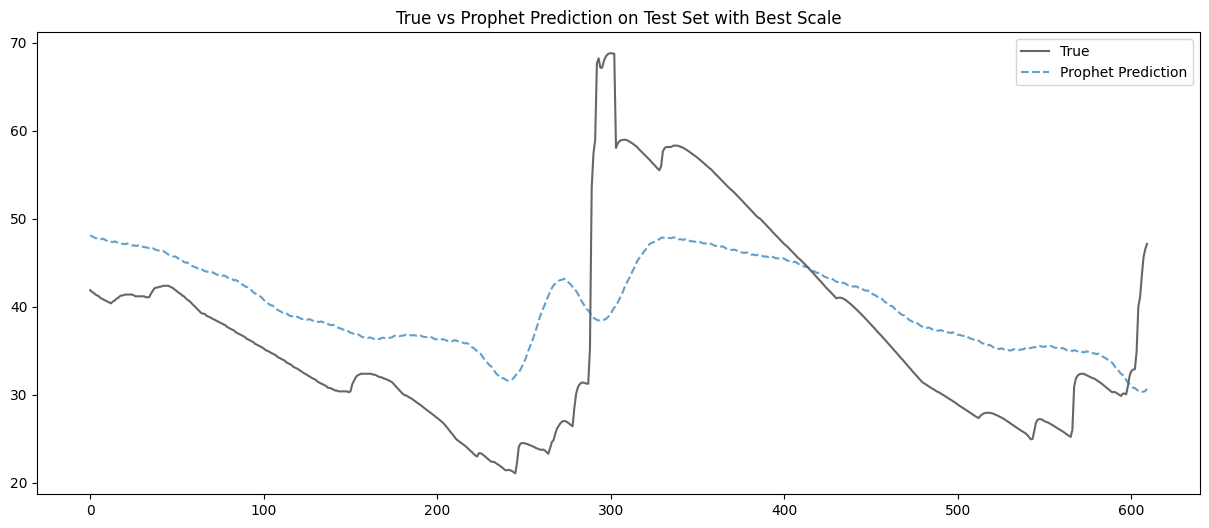

In [46]:
# 가정: dam_scaled에 'date'라는 이름의 날짜 column이 있습니다.
prophet_data_train = dam_scaled[['date', 'obs_storage_rate']][:split_index]
prophet_data_test = dam_scaled[['date', 'obs_storage_rate']][split_index:]

prophet_data_train.columns = ['ds', 'y']
prophet_data_test.columns = ['ds', 'y']

from prophet import Prophet

# 후보 changepoint_prior_scale 값들 정의
candidate_scales = [0.01,0.02,0.03,0.04,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
best_smape = float('inf')
best_scale = 0.1  # 초기값 설정

# Grid search 수행
for scale in candidate_scales:
    # Prophet 모델 초기화 및 학습
    model = Prophet(changepoint_prior_scale=scale, daily_seasonality = True)
    model.fit(prophet_data_train)

    # 미래 데이터 프레임 생성 및 예측
    future = model.make_future_dataframe(periods=len(prophet_data_test))
    forecast = model.predict(future)
    y_pred = forecast['yhat'][split_index:].values

    # SMAPE 계산
    current_smape = smape(prophet_data_test['y'], y_pred)
    if current_smape < best_smape:
        best_smape = current_smape
        best_scale = scale

# 최적의 changepoint_prior_scale 값으로 모델 초기화 및 학습
model_prophet = Prophet(changepoint_prior_scale=best_scale)
model_prophet.fit(prophet_data_train)

# 미래 데이터 프레임 생성 및 예측
future = model_prophet.make_future_dataframe(periods=len(prophet_data_test))
forecast = model_prophet.predict(future)
y_pred_prophet = forecast['yhat'][split_index:].values

# 결과 출력
print(f"Best changepoint_prior_scale: {best_scale}")
print(f"SMAPE for Prophet with best scale: {best_smape}")

# 그래프로 표현
plt.figure(figsize=(15, 6))
plt.plot(prophet_data_test['y'].values, label='True', color='black', alpha=0.6)
plt.plot(y_pred_prophet, label='Prophet Prediction', linestyle='dashed', alpha=0.7)
plt.title("True vs Prophet Prediction on Test Set with Best Scale")
plt.legend()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_56jfqhd/e0_ck4ag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_56jfqhd/hf3t07cb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66269', 'data', 'file=/tmp/tmp_56jfqhd/e0_ck4ag.json', 'init=/tmp/tmp_56jfqhd/hf3t07cb.json', 'output', 'file=/tmp/tmp_56jfqhd/prophet_modelutelm9r9/prophet_model-20230809191738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_56jfqhd/ziu9164h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_56jfqhd/lnwwh5i3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best changepoint_prior_scale: 0.01
SMAPE for Prophet with best scale: 15.515047194852158


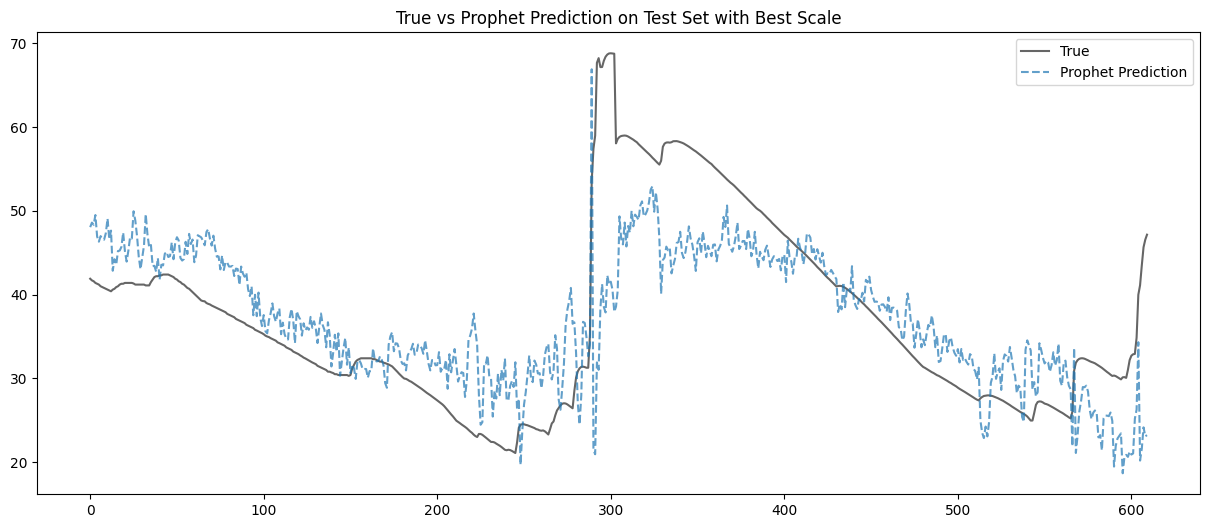

In [47]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# train, test 데이터 준비
prophet_data_train = dam_scaled[['date', 'obs_storage_rate']][:split_index]
prophet_data_test = dam_scaled[['date', 'obs_storage_rate']][split_index:]

prophet_data_train.columns = ['ds', 'y']
prophet_data_test.columns = ['ds', 'y']

# 기타 feature들을 train과 test 데이터셋에 추가
for col in dam_scaled.columns:
    if col not in ['date', 'obs_storage_rate', 'storage_rate', 'storage']:
        prophet_data_train[col] = dam_scaled[col][:split_index]
        prophet_data_test[col] = dam_scaled[col][split_index:]

# 후보 changepoint_prior_scale 값들 정의 및 초기 설정
candidate_scales = [0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best_smape = float('inf')
best_scale = 0.1

for scale in candidate_scales:
    model = Prophet(changepoint_prior_scale=scale, daily_seasonality=True)

    # 추가적인 feature들을 Prophet 모델에 추가
    for col in dam_scaled.columns:
        if col not in ['date', 'obs_storage_rate', 'storage_rate', 'storage']:
            model.add_regressor(col)

    model.fit(prophet_data_train)

    # 예측을 위한 future 데이터 프레임 생성
    future_with_features = prophet_data_test.drop('y', axis=1)

    # 예측
    forecast = model.predict(future_with_features)
    y_pred = forecast['yhat'].values

    # SMAPE 계산
    current_smape = smape(prophet_data_test['y'], y_pred)
    if current_smape < best_smape:
        best_smape = current_smape
        best_scale = scale

# 최적의 changepoint_prior_scale로 모델 학습
model_prophet = Prophet(changepoint_prior_scale=best_scale)
for col in dam_scaled.columns:
    if col not in ['date', 'obs_storage_rate', 'storage_rate', 'storage']:
        model_prophet.add_regressor(col)
model_prophet.fit(prophet_data_train)

# 예측을 위한 future 데이터 프레임 생성
future_with_features = prophet_data_test.drop('y', axis=1)

# 예측
forecast = model_prophet.predict(future_with_features)
y_pred_prophet = forecast['yhat'].values

# 결과 출력 및 그래프 표현
print(f"Best changepoint_prior_scale: {best_scale}")
print(f"SMAPE for Prophet with best scale: {best_smape}")

plt.figure(figsize=(15, 6))
plt.plot(prophet_data_test['y'].values, label='True', color='black', alpha=0.6)
plt.plot(y_pred_prophet, label='Prophet Prediction', linestyle='dashed', alpha=0.7)
plt.title("True vs Prophet Prediction on Test Set with Best Scale")
plt.legend()
plt.show()


In [68]:
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49, 0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59, 0.6, 0.7, 0.8, 0.9, 1.0]
best_smape_ewm = float('inf')
best_alpha = None

for alpha in alphas:
    y_pred_ewm = pd.Series(y_pred_prophet).ewm(alpha=alpha).mean().values
    current_smape_ewm = smape(prophet_data_test['y'].values, y_pred_ewm)

    if current_smape_ewm < best_smape_ewm:
        best_smape_ewm = current_smape_ewm
        best_alpha = alpha

print(f"Best alpha: {best_alpha}")
print(f"SMAPE for EWMA Prophet Prediction with best alpha: {best_smape_ewm}")

Best alpha: 0.45
SMAPE for EWMA Prophet Prediction with best alpha: 15.322650790916803


SMAPE for Prophet with best scale: 15.322650790916803


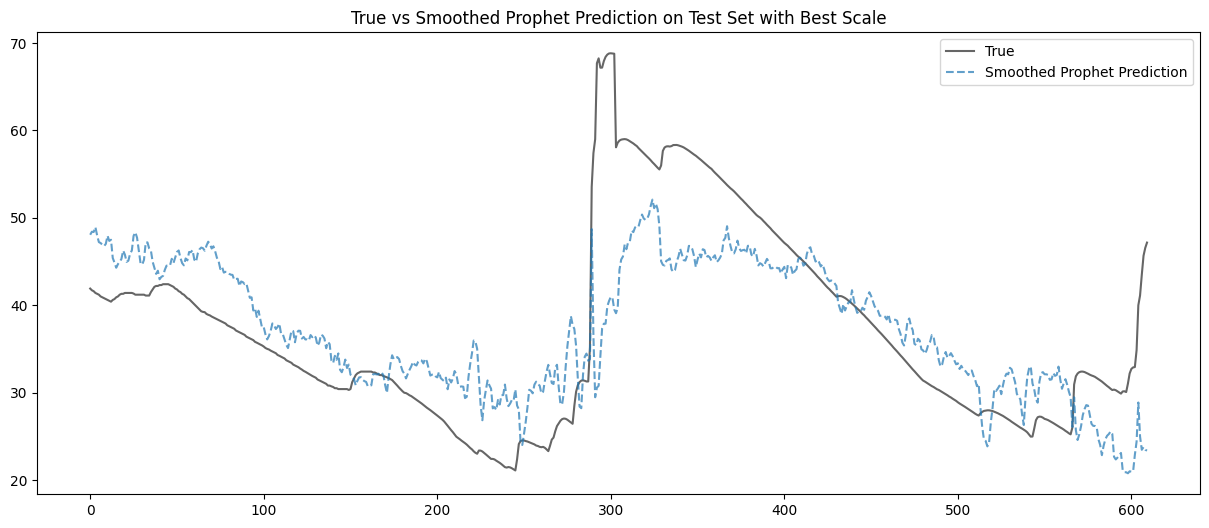

In [69]:
alpha = best_alpha # 지수 가중치. 0과 1 사이의 값을 가집니다. 값이 작을수록 평활화 정도가 커집니다.

y_pred_ewm = pd.Series(y_pred_prophet).ewm(alpha=alpha).mean().values

smape_ewm = smape(prophet_data_test['y'].values, y_pred_ewm)

# 결과 출력 및 그래프 표현
print(f"SMAPE for Prophet with best scale: {smape_ewm}")

plt.figure(figsize=(15, 6))
plt.plot(prophet_data_test['y'].values, label='True', color='black', alpha=0.6)
plt.plot(y_pred_ewm, label='Smoothed Prophet Prediction', linestyle='dashed', alpha=0.7)
plt.title("True vs Smoothed Prophet Prediction on Test Set with Best Scale")
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

def smape(y_true, y_pred):
    return 100 * (2 * abs(y_pred - y_true).sum() / (abs(y_true).sum() + abs(y_pred).sum()))

def compute_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def compute_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)


In [71]:
y_true = prophet_data_test['y'].values

rmse_value = compute_rmse(y_true, y_pred_ewm)
smape_value = smape(y_true, y_pred_ewm)
r2_value = compute_r2(y_true, y_pred_ewm)

print(f"RMSE: {rmse_value}")
print(f"SMAPE: {smape_value}")
print(f"R^2: {r2_value}")


RMSE: 7.5910343849309525
SMAPE: 15.322650790916803
R^2: 0.5237459686859223


### 정수장 데이터 feature 추가해서 해보기

- 날짜 데이터 가공도 필요해보이고
- 결측치 어떻게 채울지도 생각해봐야 할듯.